# Data Preprocessing -1- Black Friday:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df = pd.read_csv('black_friday.csv')
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# 1- Data Cleaning:
no need for data cleaning since the vales are considered to be acceptable and logical

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,23961.000000


# 2- Removing Missing Data:
## a) counting NaNs and finding if other words were used to present missing values

In [6]:
cat_att=['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for cat in cat_att:
    notFound=0
    for ex in df[cat]:
        if ('x'or'xx'or'unknown'or'not found' or 'missing') in ex.lower():
            notFound +=1
    print(f'Category:{cat} -  {notFound} missing data\n')

Category:Product_ID -  0 missing data

Category:Gender -  0 missing data

Category:Age -  0 missing data

Category:City_Category -  0 missing data

Category:Stay_In_Current_City_Years -  0 missing data



In [7]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Purchase                           0
dtype: int64

Product_Category_3 should be removed more than half the data is already missing if computed with any mean it will bias towards that value

In [4]:
df = df.drop('Product_Category_3', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


Test for outliers to specify strategy

C:\Users\Nada Abbas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Nada Abbas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


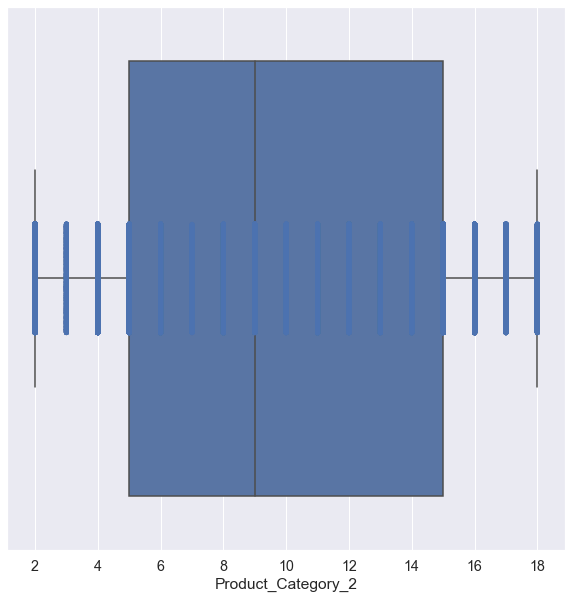

In [8]:
sns.boxplot(df['Product_Category_2'])
sns.stripplot(df['Product_Category_2'])

In [9]:
from sklearn.impute import SimpleImputer
# mean is not appropriate for float values
imputer = SimpleImputer(strategy='median')
df['Product_Category_2'] = imputer.fit_transform(df[['Product_Category_2']])

In [10]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

# 3- working with the categorical attributes:

most probably the product ID is not a highly effective attribute (Feature Engineering)

In [11]:
cat_att = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for att in cat_att:
    print(df[att].unique())
    print('*'*30)

['F' 'M']
******************************
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
******************************
['A' 'C' 'B']
******************************
['2' '4+' '3' '1' '0']
******************************


we can nottice here that all of the attributes are ordinal so we can simply use label encoding except for thegender attribute which is nominal

In [12]:
Age_dict = {'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7}
CityCategory_dict = {'A':1, 'B':2, 'C':3}
Stay_In_Current_City_Years_dict = {'0': 1, '1':2, '2':3, '3':4, '4+':5}

dicts=[Age_dict, CityCategory_dict, Stay_In_Current_City_Years_dict]
original = ['Age', 'City_Category', 'Stay_In_Current_City_Years']

for att, att_dict in zip(original, dicts):
    df[att] = df[att].map(att_dict)
    
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,1,10,1,3,0,3,9.0,8370
1,1000001,P00248942,F,1,10,1,3,0,1,6.0,15200
2,1000001,P00087842,F,1,10,1,3,0,12,9.0,1422
3,1000001,P00085442,F,1,10,1,3,0,12,14.0,1057
4,1000002,P00285442,M,7,16,3,5,0,8,9.0,7969


In [13]:
cat_att = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for att in cat_att:
    print(df[att].unique())
    print('*'*30)

['F' 'M']
******************************
[1 7 3 5 6 4 2]
******************************
[1 3 2]
******************************
[3 5 4 2 1]
******************************


In [17]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df.head(5)

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_M
0,1000001,P00069042,1,10,1,3,0,3,9.0,8370,0
1,1000001,P00248942,1,10,1,3,0,1,6.0,15200,0
2,1000001,P00087842,1,10,1,3,0,12,9.0,1422,0
3,1000001,P00085442,1,10,1,3,0,12,14.0,1057,0
4,1000002,P00285442,7,16,3,5,0,8,9.0,7969,1


In [18]:
df['Stay_In_Current_City_Years'].unique()

array([3, 5, 4, 2, 1], dtype=int64)

In [19]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [23]:
df['Occupation'].max()

20

# 4- Feature Scaling:

In [27]:
df.describe()

,User_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_M
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,3.496430,8.076707,2.042640,2.858418,0.409653,5.404270,9.576434,9263.968713,0.753105
std,1.727592e+03,1.353632,6.522660,0.760211,1.289443,0.491770,3.936211,4.226025,5023.065394,0.431205
min,1.000001e+06,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,12.000000,0.000000
25%,1.001516e+06,3.000000,2.000000,1.000000,2.000000,0.000000,1.000000,8.000000,5823.000000,1.000000
50%,1.003077e+06,3.000000,7.000000,2.000000,3.000000,0.000000,5.000000,9.000000,8047.000000,1.000000
75%,1.004478e+06,4.000000,14.000000,3.000000,4.000000,1.000000,8.000000,14.000000,12054.000000,1.000000
max,1.006040e+06,7.000000,20.000000,3.000000,5.000000,1.000000,20.000000,18.000000,23961.000000,1.000000


the attributes ranges are very near each other so no nead for feature scaling here though I would simply drop the user ID and Product ID since they are not necessary

# 5- Split to Train and Test:

In [28]:
from sklearn.model_selection import train_test_split
x = df.drop('Purchase', axis=1)
y = df['Purchase']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [30]:
print(f'x_train: {len(x_train)}  -   x_test: {len(x_test)}  -  y_train: {len(y_train)}  -  y_test:{len(y_test)}')

x_train: 440054  -   x_test: 110014  -  y_train: 440054  -  y_test:110014


# This was exactly what we learnt in this session